In [2]:
##### 真实案例 #####
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
weather = pd.read_csv(r"A:\Anaconda\extra\weatherAUS.csv",index_col = 0)
weather = weather.reset_index()
weather.dropna(subset=['RainTomorrow'], inplace=True)
weather.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [3]:
#特征矩阵和标签分开
x = weather.iloc[:,:-1]
y = weather.iloc[:,-1].astype(str)
print(x.shape);print(y.shape)

(142193, 22)
(142193,)


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
x.isnull().mean() #查看缺失值比例
#要有不同的缺失值填补策略

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
dtype: float64

In [6]:
np.unique(y)

array(['No', 'Yes'], dtype=object)

In [7]:
#真实数据分训练测试集并且恢复索引
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.18, random_state =420)
for i in [xtrain,xtest,ytrain,ytest]:
    i.index = range(i.shape[0])

In [8]:
ytrain.value_counts() #查看标签是否样本不均衡
ytest.value_counts()

No     19781
Yes     5814
Name: RainTomorrow, dtype: int64

In [9]:
# 处理标签
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(y) #用训练集的训练结果告诉encoder分为yes,no,nan三类
ytrain = pd.DataFrame(encoder.transform(ytrain)) #分类transform
ytest = pd.DataFrame(encoder.transform(ytest))

In [10]:
# 处理特征矩阵
xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
MinTemp,116081.0,12.188207,6.403102,-8.5,-1.800,1.8,4.0,7.6,12.0,16.8,20.8,23.000,25.80,31.9
MaxTemp,116327.0,23.231956,7.114286,-4.8,9.200,12.9,14.5,17.9,22.6,28.3,32.9,35.500,40.10,48.1
Rainfall,115444.0,2.354601,8.419336,0.0,0.000,0.0,0.0,0.0,0.0,0.8,6.2,13.000,37.40,367.6
Evaporation,66559.0,5.465473,4.170460,0.0,0.400,1.0,1.4,2.6,4.8,7.4,10.2,12.000,18.40,86.2
Sunshine,60809.0,7.620763,3.782997,0.0,0.000,0.3,1.5,4.9,8.5,10.6,12.1,12.800,13.40,14.3
WindGustSpeed,108986.0,39.971923,13.600199,6.0,15.000,20.0,24.0,31.0,39.0,48.0,57.0,65.000,80.15,135.0
WindSpeed9am,115487.0,14.007767,8.910148,0.0,0.000,0.0,4.0,7.0,13.0,19.0,26.0,30.000,39.00,130.0
WindSpeed3pm,114434.0,18.630241,8.814139,0.0,2.000,6.0,7.0,13.0,19.0,24.0,30.0,33.000,43.00,87.0
Humidity9am,115154.0,68.823575,19.067263,0.0,17.000,34.0,44.0,57.0,70.0,83.0,94.0,98.000,100.00,100.0
Humidity3pm,113614.0,51.465779,20.769424,0.0,9.000,17.0,23.0,37.0,52.0,66.0,79.0,87.000,98.00,100.0


In [11]:
##处理异常值:Cloud(因为cloud数据只能为0-8)
xtrain.loc[xtrain.loc[:,"Cloud9am"] == 9,"Cloud9am"]

88800    9.0
Name: Cloud9am, dtype: float64

In [12]:
xtest.loc[xtest.loc[:,"Cloud9am"] == 9,"Cloud9am"]

19646    9.0
Name: Cloud9am, dtype: float64

In [13]:
xtrain.loc[xtrain.loc[:,"Cloud3pm"] == 9,"Cloud3pm"]

4037    9.0
Name: Cloud3pm, dtype: float64

In [14]:
xtest.loc[xtest.loc[:,"Cloud3pm"] == 9,"Cloud3pm"]

Series([], Name: Cloud3pm, dtype: float64)

In [15]:
xtrain = xtrain.drop(index = [4037,88800])
ytrain = ytrain.drop(index = [4037,88800])
xtest = xtest.drop(index = 19646)
ytest = ytest.drop(index = 19646)
for i in [xtrain,xtest,ytrain,ytest]:
    i.index = range(i.shape[0])

In [16]:
##处理时间(日期)
xtrain.iloc[:,0].value_counts().count() #有多少不同的日期？

3408

In [17]:
xtrain["Rainfall"].isnull().sum() #有多少列为空值？

1154

In [18]:
#创造新特征:今天是否下雨
#根据Rainfall判别,新加一列“RainT”
xtrain.loc[xtrain["Rainfall"] >= 0.8, "RainT"] = "Yes"
xtrain.loc[xtrain["Rainfall"] < 0.8, "RainT"] = "No"
xtrain.loc[xtrain["Rainfall"] == np.nan, "RainT"] = np.nan
xtest.loc[xtest["Rainfall"] >= 0.8, "RainT"] = "Yes"
xtest.loc[xtest["Rainfall"] < 0.8, "RainT"] = "No"
xtest.loc[xtest["Rainfall"] == np.nan, "RainT"] = np.nan

In [19]:
#创造特征:月份
xtrain.loc[0,"Date"].split("-") #按照 - 进行分割

['2012', '02', '25']

In [20]:
int(xtrain.loc[0,"Date"].split("-")[1]) #提取月份,int取整数

2

In [21]:
# apply 对dataframe中的某一列进行修改
#lambda x匿名函数:在dataframe上这一列的每一行执行()中命令
xtrain["Date"] = xtrain["Date"].apply(lambda x:int(x.split("-")[1]))
xtest["Date"] = xtest["Date"].apply(lambda x:int(x.split("-")[1]))
#改名字Date到Month
xtrain = xtrain.rename(columns = {"Date":"Month"})
xtest = xtest.rename(columns = {"Date":"Month"})
print(xtrain.loc[:,"Month"].value_counts());print(xtest.loc[:,"Month"].value_counts())

3     10738
5     10729
1     10631
6     10164
7      9724
10     9629
8      9611
11     9350
4      9327
9      9253
12     8805
2      8635
Name: Month, dtype: int64
5     2325
3     2298
1     2290
6     2225
10    2175
8     2151
11    2110
9     2091
7     2055
12    2005
4     1979
2     1890
Name: Month, dtype: int64


In [22]:
from sklearn.preprocessing import OneHotEncoder
month_data_train = xtrain.iloc[:,xtrain.columns.get_loc("Month")]
ohe_train = OneHotEncoder().fit(month_data_train.values.reshape(-1, 1))
ohe_result_train = ohe_train.transform(month_data_train.values.reshape(-1, 1)).toarray()
xtrain = pd.concat([xtrain,pd.DataFrame(ohe_result_train)],axis=1)

month_data_test = xtest.iloc[:,xtest.columns.get_loc("Month")]
ohe_test = OneHotEncoder().fit(month_data_test.values.reshape(-1, 1))
ohe_result_test = ohe_test.transform(month_data_test.values.reshape(-1, 1)).toarray()
xtest = pd.concat([xtest,pd.DataFrame(ohe_result_test)],axis=1)

xtrain.drop(["Month"],axis = 1, inplace = True)
xtest.drop(["Month"],axis = 1, inplace = True)


xtrain = xtrain.rename(columns={0: "Month_1", 1: "Month_2", 2: "Month_3", 3: "Month_4",
                                4: "Month_5", 5: "Month_6", 6: "Month_7", 7: "Month_8",
                                8: "Month_9", 9: "Month_10", 10: "Month_11", 11: "Month_12"})

xtest = xtest.rename(columns={0: "Month_1", 1: "Month_2", 2: "Month_3", 3: "Month_4",
                                4: "Month_5", 5: "Month_6", 6: "Month_7", 7: "Month_8",
                                8: "Month_9", 9: "Month_10", 10: "Month_11", 11: "Month_12"})

In [23]:
xtrain.loc[:,"Location"].value_counts().count()

49

In [24]:
## 缺失值处理
#分类型变量填众数,连续型变量填平均值
#测试集填补训练集的众数和均值
classify_features = xtrain.columns[xtrain.dtypes  == "object"].tolist()
classify_features

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainT']

In [25]:
cloud = ["Cloud9am","Cloud3pm"] #云层信息也是分类型
classify_features = classify_features + cloud
classify_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainT',
 'Cloud9am',
 'Cloud3pm']

In [26]:
from sklearn.impute import SimpleImputer
most_fre_imputer = SimpleImputer (missing_values = np.nan,
                                  strategy = "most_frequent"
                                 )
most_fre_imputer.fit(xtrain.loc[:,classify_features])

SimpleImputer(strategy='most_frequent')

In [27]:
xtrain.loc[:,classify_features] = most_fre_imputer.transform(xtrain.loc[:,classify_features])
xtest.loc[:,classify_features] = most_fre_imputer.transform(xtest.loc[:,classify_features])
print(xtrain.loc[:,classify_features].isnull().sum());print(xtest.loc[:,classify_features].isnull().sum())

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
RainT          0
Cloud9am       0
Cloud3pm       0
dtype: int64
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
RainT          0
Cloud9am       0
Cloud3pm       0
dtype: int64


In [28]:
#将分类型变量转变为数字(编码)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#普通分类
oe_features = ["RainToday","RainT","Cloud9am","Cloud3pm"]
oe = OrdinalEncoder()
oe = oe.fit(xtrain.loc[:,oe_features])
xtrain.loc[:,oe_features] = oe.transform(xtrain.loc[:,oe_features])
xtest.loc[:,oe_features] = oe.transform(xtest.loc[:,oe_features])

C:\Users\boyua\AppData\Local\Temp\ipykernel_15372\997094050.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  xtrain.loc[:,oe_features] = oe.transform(xtrain.loc[:,oe_features])
C:\Users\boyua\AppData\Local\Temp\ipykernel_15372\997094050.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  xtest.loc[:,oe_features] = oe.transform(xtest.loc[:,oe_features])


In [29]:
#哑变量
from sklearn.preprocessing import OneHotEncoder
oh_features = ["WindGustDir","WindDir9am","WindDir3pm"]

train_oh_features = xtrain[oh_features]
oh_instantiate_train = OneHotEncoder().fit(train_oh_features)
result_train = oh_instantiate_train.transform(train_oh_features).toarray()
test_oh_features = xtest[oh_features]
oh_instantiate_test = OneHotEncoder().fit(test_oh_features)
result_test = oh_instantiate_test.transform(test_oh_features).toarray()
xtrain = pd.concat([xtrain,pd.DataFrame(result_train)],axis=1)
xtest = pd.concat([xtest,pd.DataFrame(result_test)],axis=1)

xtrain.drop(["WindGustDir","WindDir9am","WindDir3pm"],axis = 1, inplace = True)
xtest.drop(["WindGustDir","WindDir9am","WindDir3pm"],axis = 1, inplace = True)
xtrain = xtrain.rename(columns={0:'WindGustDir_E', 1:'WindGustDir_ENE', 2:'WindGustDir_ESE',
                                3:'WindGustDir_N', 4:'WindGustDir_NE', 5:'WindGustDir_NNE',
                                6:'WindGustDir_NNW', 7:'WindGustDir_NW', 8:'WindGustDir_S',
                                9:'WindGustDir_SE', 10:'WindGustDir_SSE', 11:'WindGustDir_SSW',
                                12:'WindGustDir_SW', 13:'WindGustDir_W', 14:'WindGustDir_WNW',
                                15:'WindGustDir_WSW', 16:'WindDir9am_E', 17:'WindDir9am_ENE',
                                18:'WindDir9am_ESE', 19:'WindDir9am_N', 20:'WindDir9am_NE',
                                21:'WindDir9am_NNE', 22:'WindDir9am_NNW', 23:'WindDir9am_NW',
                                24:'WindDir9am_S', 25:'WindDir9am_SE', 26:'WindDir9am_SSE',
                                27:'WindDir9am_SSW', 28:'WindDir9am_SW', 29:'WindDir9am_W',
                                30:'WindDir9am_WNW', 31:'WindDir9am_WSW', 32:'WindDir3pm_E',
                                33:'WindDir3pm_ENE', 34:'WindDir3pm_ESE', 35:'WindDir3pm_N',
                                36:'WindDir3pm_NE', 37:'WindDir3pm_NNE', 38:'WindDir3pm_NNW',
                                39:'WindDir3pm_NW', 40:'WindDir3pm_S', 41:'WindDir3pm_SE', 
                                42:'WindDir3pm_SSE', 43:'WindDir3pm_SSW', 44:'WindDir3pm_SW', 
                                45:'WindDir3pm_W', 46:'WindDir3pm_WNW', 47:'WindDir3pm_WSW'})

xtest = xtest.rename(columns = {0:'WindGustDir_E', 1:'WindGustDir_ENE', 2:'WindGustDir_ESE',
                                3:'WindGustDir_N', 4:'WindGustDir_NE', 5:'WindGustDir_NNE',
                                6:'WindGustDir_NNW', 7:'WindGustDir_NW', 8:'WindGustDir_S',
                                9:'WindGustDir_SE', 10:'WindGustDir_SSE', 11:'WindGustDir_SSW',
                                12:'WindGustDir_SW', 13:'WindGustDir_W', 14:'WindGustDir_WNW',
                                15:'WindGustDir_WSW', 16:'WindDir9am_E', 17:'WindDir9am_ENE',
                                18:'WindDir9am_ESE', 19:'WindDir9am_N', 20:'WindDir9am_NE',
                                21:'WindDir9am_NNE', 22:'WindDir9am_NNW', 23:'WindDir9am_NW',
                                24:'WindDir9am_S', 25:'WindDir9am_SE', 26:'WindDir9am_SSE',
                                27:'WindDir9am_SSW', 28:'WindDir9am_SW', 29:'WindDir9am_W',
                                30:'WindDir9am_WNW', 31:'WindDir9am_WSW', 32:'WindDir3pm_E',
                                33:'WindDir3pm_ENE', 34:'WindDir3pm_ESE', 35:'WindDir3pm_N',
                                36:'WindDir3pm_NE', 37:'WindDir3pm_NNE', 38:'WindDir3pm_NNW',
                                39:'WindDir3pm_NW', 40:'WindDir3pm_S', 41:'WindDir3pm_SE', 
                                42:'WindDir3pm_SSE', 43:'WindDir3pm_SSW', 44:'WindDir3pm_SW', 
                                45:'WindDir3pm_W', 46:'WindDir3pm_WNW', 47:'WindDir3pm_WSW'})

In [30]:
col = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
       'Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
mean_imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
mean_imputer = mean_imputer.fit(xtrain.loc[:,col])
xtrain.loc[:,col] = mean_imputer.transform(xtrain.loc[:,col])
xtest.loc[:,col] = mean_imputer.transform(xtest.loc[:,col])

In [31]:
#无量纲化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(xtrain.loc[:,col])
xtrain.loc[:,col] = ss.transform(xtrain.loc[:,col])
xtest.loc[:,col] = ss.transform(xtest.loc[:,col]) 

In [32]:
xtrain.drop(["Location"],axis = 1, inplace = True)
xtest.drop(["Location"],axis = 1, inplace = True)

In [35]:
#########建模############
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,recall_score

In [33]:
ytrain = ytrain.iloc[:,0].ravel()
ytest = ytest.iloc[:,0].ravel()
for kernel in ["linear"]:
    times = time()
    model = SVC(kernel = kernel,
               gamma = "auto",
               degree = 1,
               cache_size = 5000
               ).fit(xtrain,ytrain)
    result = model.predict(xtest)    #获取预测结果
    score = model.score(xtest,ytest)    #预测结果与真实结果对比获得accuracy
    recall = recall_score(ytest,result)    #预测结果与真实结果对比获得recall
    auc = roc_auc_score(ytest,model.decision_function(xtest))    #获得auc曲线
    print ("Kernel: %s  Accuracy: %f, Recall: %f, Auc area: %f" % (kernel,score,recall,auc))
    print (datetime.datetime.fromtimestamp(time()-times).strftime("%H:%M:%S:%f"))

Kernel: linear  Accuracy: 0.843323, Recall: 0.473340, Auc area: 0.865909
20:57:06:865862


In [34]:
####调参
##最高的召回率recall
#如果追求较高的recall(最高的少数类分辨),则在意参数class_weight

In [35]:
##class_weight更倾向少数类
times = time()
model = SVC(kernel = "linear",
            gamma = "auto",
            class_weight = {1:10}, #类别1的权重为10(类别0权重为1)
            cache_size = 5000
            ).fit(xtrain,ytrain)
result = model.predict(xtest)
score = model.score(xtest,ytest)
recall = recall_score(ytest,result)
auc = roc_auc_score(ytest,model.decision_function(xtest))
print ("Kernel: %s  Accuracy: %f, Recall: %f, Auc area: %f" % (kernel,score,recall,auc))
print (datetime.datetime.fromtimestamp(time()-times).strftime("%H:%M:%S:%f"))

Kernel: linear  Accuracy: 0.627764, Recall: 0.929137, Auc area: 0.864820
21:43:14:856087


In [ ]:
from baocuo import stopstopstop!!! #报错专用

In [ ]:
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    if kernel == "poly":
        for degree in [1, 2, 3, 4, 5]:
            times = time()
            model = SVC(kernel=kernel,
                        gamma="auto",
                        degree=degree,
                        cache_size=5000).fit(xtrain, ytrain)
            result = model.predict(xtest)
            score = model.score(xtest, ytest)
            auc = roc_auc_score(ytest, model.decision_function(xtest))
            recall = recall_score(ytest, result)
            print("Kernel: %s (%f degree)  Accuracy: %f, Recall: %f, Auc area: %f" % (kernel, degree, score, recall, auc))
            print(datetime.datetime.fromtimestamp(time() - times).strftime("%H:%M:%S:%f"))
    else:
        times = time()
        model = SVC(kernel=kernel,
                    gamma="auto",
                    cache_size=5000).fit(xtrain, ytrain)
        result = model.predict(xtest)
        score = model.score(xtest, ytest)
        auc = roc_auc_score(ytest, model.decision_function(xtest))
        recall = recall_score(ytest, result)
        print("Kernel: %s  Accuracy: %f, Recall: %f, Auc area: %f" % (kernel, score, recall, auc))
        print(datetime.datetime.fromtimestamp(time() - times).strftime("%H:%M:%S:%f"))
        
#result
#Kernel: linear  Accuracy: 0.843205, Recall: 0.472652, Auc area: 0.865903
#28:11
#Kernel: rbf  Accuracy: 0.849457, Recall: 0.456828, Auc area: 0.854883
#16:06
#Kernel: sigmoid  Accuracy: 0.760178, Recall: 0.468352, Auc area: 0.729452
#20:02
#Kernel: poly (1.000000 degree)  Accuracy: 0.843166, Recall: 0.471448, Auc area: 0.865959
#13:04
#Kernel: poly (2.000000 degree)  Accuracy: 0.847347, Recall: 0.452356, Auc area: 0.865292
#14:44
#Kernel: poly (3.000000 degree)  Accuracy: 0.848675, Recall: 0.448228, Auc area: 0.855647
#20:28
#Kernel: poly (4.000000 degree)  Accuracy: 0.850277, Recall: 0.453388, Auc area: 0.849829
#40:40
#Kernel: poly (5.000000 degree)  Accuracy: 0.851723, Recall: 0.459408, Auc area: 0.846330
#03:38

In [ ]:
##class_weight使用 "balanced"
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    if kernel == "poly":
        for degree in [1, 2, 3, 4, 5]:
            times = time()
            model = SVC(kernel=kernel,
                        gamma="auto",
                        class_weight = "balanced",
                        degree=degree,
                        cache_size=5000).fit(xtrain, ytrain)
            result = model.predict(xtest)
            score = model.score(xtest, ytest)
            auc = roc_auc_score(ytest, model.decision_function(xtest))
            recall = recall_score(ytest, result)
            print("Kernel: %s (%f degree)  Accuracy: %f, Recall: %f, Auc area: %f" % (kernel, degree, score, recall, auc))
            print(datetime.datetime.fromtimestamp(time() - times).strftime("%H:%M:%S:%f"))
    else:
        times = time()
        model = SVC(kernel=kernel,
                    gamma="auto",
                    class_weight = "balanced",
                    cache_size=5000).fit(xtrain, ytrain)
        result = model.predict(xtest)
        score = model.score(xtest, ytest)
        auc = roc_auc_score(ytest, model.decision_function(xtest))
        recall = recall_score(ytest, result)
        print("Kernel: %s  Accuracy: %f, Recall: %f, Auc area: %f" % (kernel, score, recall, auc))
        print(datetime.datetime.fromtimestamp(time() - times).strftime("%H:%M:%S:%f"))
        
        
#result
#Kernel: linear  Accuracy: 0.792920, Recall: 0.766082, Auc area: 0.866870
#48:14
#Kernel: rbf  Accuracy: 0.803313, Recall: 0.783970, Auc area: 0.880933
#31:36
#Kernel: sigmoid  Accuracy: 0.672072, Recall: 0.676815, Auc area: 0.722679
#24:59
#Kernel: poly (1.000000 degree)  Accuracy: 0.792842, Recall: 0.765738, Auc area: 0.866884
#27:33
#Kernel: poly (2.000000 degree)  Accuracy: 0.808197, Recall: 0.765394, Auc area: 0.876856
#28:25
#Kernel: poly (3.000000 degree)  Accuracy: 0.811557, Recall: 0.763158, Auc area: 0.878329
#28:33
#Kernel: poly (4.000000 degree)  Accuracy: 0.813706, Recall: 0.753526, Auc area: 0.876388
#36:16
#Kernel: poly (5.000000 degree)  Accuracy: 0.816051, Recall: 0.740454, Auc area: 0.873485
#54:22

In [39]:
##最高的准确度
#查看混淆矩阵  (及特异度)
#如果模型可以捕捉更多的少数类
from sklearn.metrics import confusion_matrix  as CM

model_init_rbf = SVC (kernel = "rbf",
             gamma = "auto",
             cache_size = 5000,
            ).fit(xtrain,ytrain)
init_rbf_result = model_init_rbf.predict(xtest)

In [40]:
#混淆矩阵
confusion_matrix_init_rbf = CM(ytest,init_rbf_result,labels = (1,0))
confusion_matrix_init_rbf

array([[ 2656,  3158],
       [  695, 19085]], dtype=int64)

In [41]:
#特异度
specificity_init_rbd = confusion_matrix_init_rbf[1,1]/confusion_matrix_init_rbf[1,:].sum()
specificity_init_rbd

0.9648634984833164

In [50]:
#特异度已经很好
#希望模型判断更多的少数类以提高accuracy
#调参: class_weight 使class_weight偏移很小的数值
cw_range = np.linspace(0.005,0.06,12)
for i in cw_range:
    times = time()
    model = SVC(kernel = "rbf",
                gamma = "auto",
                cache_size = 5000,
                class_weight = {1:1+i}
               ).fit(xtrain,ytrain)
    result = model.predict(xtest)
    score = model.score(xtest, ytest)
    auc = roc_auc_score(ytest, model.decision_function(xtest))
    recall = recall_score(ytest, result)
    print("Class weight: 1:%f,  Kernel: rbf,  Accuracy: %f, Recall: %f, Auc area: %f" % (1+i, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S"))

Class weight: 1:1.005000,  Kernel: rbf,  Accuracy: 0.849496, Recall: 0.458376, Auc area: 0.855175
19:56
Class weight: 1:1.010000,  Kernel: rbf,  Accuracy: 0.849730, Recall: 0.460440, Auc area: 0.855415
18:20
Class weight: 1:1.015000,  Kernel: rbf,  Accuracy: 0.849691, Recall: 0.461300, Auc area: 0.855640
18:00
Class weight: 1:1.020000,  Kernel: rbf,  Accuracy: 0.849809, Recall: 0.462504, Auc area: 0.855880
18:28
Class weight: 1:1.025000,  Kernel: rbf,  Accuracy: 0.849848, Recall: 0.464224, Auc area: 0.856076
20:13
Class weight: 1:1.030000,  Kernel: rbf,  Accuracy: 0.849965, Recall: 0.465600, Auc area: 0.856255
18:26
Class weight: 1:1.035000,  Kernel: rbf,  Accuracy: 0.850121, Recall: 0.467320, Auc area: 0.856436
18:29
Class weight: 1:1.040000,  Kernel: rbf,  Accuracy: 0.850121, Recall: 0.468352, Auc area: 0.856623
18:35
Class weight: 1:1.045000,  Kernel: rbf,  Accuracy: 0.850160, Recall: 0.469556, Auc area: 0.856848
18:36
Class weight: 1:1.050000,  Kernel: rbf,  Accuracy: 0.849926, Rec

In [63]:
#细化学习曲线
new_range = np.linspace(0.0425,0.05,7)
for i in new_range:
    times = time()
    model = SVC(kernel = "rbf",
                gamma = "auto",
                cache_size = 5000,
                class_weight = {1:1+i}
               ).fit(xtrain,ytrain)
    result = model.predict(xtest)
    score = model.score(xtest, ytest)
    auc = roc_auc_score(ytest, model.decision_function(xtest))
    recall = recall_score(ytest, result)
    print("Class weight: 1:%f,  Kernel: rbf,  Accuracy: %f, Recall: %f, Auc area: %f" % (1+i, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S"))

Class weight: 1:1.042500,  Kernel: rbf,  Accuracy: 0.850043, Recall: 0.468868, Auc area: 0.856729
19:18
Class weight: 1:1.043750,  Kernel: rbf,  Accuracy: 0.850160, Recall: 0.469384, Auc area: 0.856796
19:23
Class weight: 1:1.045000,  Kernel: rbf,  Accuracy: 0.850160, Recall: 0.469556, Auc area: 0.856848
18:51
Class weight: 1:1.046250,  Kernel: rbf,  Accuracy: 0.850160, Recall: 0.469900, Auc area: 0.856905
18:45
Class weight: 1:1.047500,  Kernel: rbf,  Accuracy: 0.850121, Recall: 0.469900, Auc area: 0.856983
19:00
Class weight: 1:1.048750,  Kernel: rbf,  Accuracy: 0.850043, Recall: 0.469900, Auc area: 0.857035
19:33
Class weight: 1:1.050000,  Kernel: rbf,  Accuracy: 0.849926, Recall: 0.470072, Auc area: 0.857114
19:21


In [68]:
scores = []
recalls = []
aucs = []
gamma_range = np.logspace(-10,1,15)
for i in gamma_range:
    model = SVC(kernel = "rbf",
                gamma = i,
                cache_size = 8000,
                class_weight = {1:1.04625}
               ).fit(xtrain,ytrain)
    y_predict = model.predict(xtest)
    score = model.score(xtest,ytest)
    recall = recall_score(ytest, y_predict)
    auc = roc_auc_score(ytest, model.decision_function(xtest))
    scores.append(score)
    recalls.append(recall)
    aucs.append(auc)
    print("Gamma: %.8f, Accuracy: %.8f, Recall: %.8f, Auc area: %.8f" % (i, score, recall, auc))
    

print("Best gamma: %.8f, Accuracy: %.8f, Recall: %.8f, Auc area: %.8f" % (gamma_range[np.argmax(scores)], max(scores), recalls[np.argmax(scores)], aucs[np.argmax(scores)]))
plt.plot(gamma_range,scores)
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.show()

Gamma: 0.00000000, Accuracy: 0.77283738, Recall: 0.00000000, Auc area: 0.56257782
Gamma: 0.00000000, Accuracy: 0.77283738, Recall: 0.00000000, Auc area: 0.83279705
Gamma: 0.00000000, Accuracy: 0.77283738, Recall: 0.00000000, Auc area: 0.85166827
Gamma: 0.00000002, Accuracy: 0.77283738, Recall: 0.00000000, Auc area: 0.85554390
Gamma: 0.00000014, Accuracy: 0.77283738, Recall: 0.00000000, Auc area: 0.85582038
Gamma: 0.00000085, Accuracy: 0.77283738, Recall: 0.00000000, Auc area: 0.85604300
Gamma: 0.00000518, Accuracy: 0.77455654, Recall: 0.00911593, Auc area: 0.85622367
Gamma: 0.00003162, Accuracy: 0.83124951, Recall: 0.34038528, Auc area: 0.85995611
Gamma: 0.00019307, Accuracy: 0.84101743, Recall: 0.44719642, Auc area: 0.86446315
Gamma: 0.00117877, Accuracy: 0.84449480, Recall: 0.46198830, Auc area: 0.86469176
Gamma: 0.00719686, Accuracy: 0.84805032, Recall: 0.46026832, Auc area: 0.85883876
Gamma: 0.04393971, Accuracy: 0.85660702, Recall: 0.50808394, Auc area: 0.85960193
Gamma: 0.2682695

NameError: name 'plt' is not defined

In [69]:
scores = []
recalls = []
aucs = []
gamma_range = np.linspace(0.01456,0.03664,4)
for i in gamma_range:
    model = SVC(kernel = "rbf",
                gamma = i,
                cache_size = 8000,
                class_weight = {1:1.04625}
               ).fit(xtrain,ytrain)
    y_predict = model.predict(xtest)
    score = model.score(xtewst,ytest)
    recall = recall_score(ytest, y_predict)
    auc = roc_auc_score(ytest, model.decision_function(xtest))
    scores.append(score)
    recalls.append(recall)
    aucs.append(auc)
    print("Gamma: %.8f, Accuracy: %.8f, Recall: %.8f, Auc area: %.8f" % (i, score, recall, auc))

Gamma: 0.01456000, Accuracy: 0.85098070, Recall: 0.47282422, Auc area: 0.85698552
Gamma: 0.02192000, Accuracy: 0.85285614, Recall: 0.48366013, Auc area: 0.85753839
Gamma: 0.02928000, Accuracy: 0.85414550, Recall: 0.49329205, Auc area: 0.85872784
Gamma: 0.03664000, Accuracy: 0.85574744, Recall: 0.50240798, Auc area: 0.85918994


In [71]:
scores = []
recalls = []
aucs = []
gamma_range = np.linspace(0.044,0.212,4)
for i in gamma_range:
    model = SVC(kernel = "rbf",
                gamma = i,
                cache_size = 8000,
                class_weight = {1:1.04625}
               ).fit(xtrain,ytrain)
    y_predict = model.predict(xtest)
    score = model.score(xtest,ytest)
    recall = recall_score(ytest, y_predict)
    auc = roc_auc_score(ytest, model.decision_function(xtest))
    scores.append(score)
    recalls.append(recall)
    aucs.append(auc)
    print("Gamma: %.8f, Accuracy: %.8f, Recall: %.8f, Auc area: %.8f" % (i, score, recall, auc))

Gamma: 0.04400000, Accuracy: 0.85668516, Recall: 0.50842793, Auc area: 0.85960777
Gamma: 0.10000000, Accuracy: 0.85871689, Recall: 0.53285174, Auc area: 0.86372139
Gamma: 0.15600000, Accuracy: 0.85875596, Recall: 0.53543172, Auc area: 0.86594314
Gamma: 0.21200000, Accuracy: 0.85660702, Recall: 0.52081183, Auc area: 0.86753281


In [ ]:
scores = []
recalls = []
aucs = []
gamma_range = np.linspace(0.05,0.2,16)
for i in gamma_range:
    model = SVC(kernel = "rbf",
                gamma = i,
                cache_size = 8000,
                class_weight = {1:1.04625}
               ).fit(xtrain,ytrain)
    y_predict = model.predict(xtest)
    score = model.score(xtest,ytest)
    recall = recall_score(ytest, y_predict)
    auc = roc_auc_score(ytest, model.decision_function(xtest))
    scores.append(score)
    recalls.append(recall)
    aucs.append(auc)
    print("Gamma: %.5f, Accuracy: %.5f, Recall: %.5f, Auc area: %.5f" % (i, score, recall, auc))

Gamma: 0.05000, Accuracy: 0.85696, Recall: 0.51256, Auc area: 0.86019
Gamma: 0.06000, Accuracy: 0.85754, Recall: 0.51892, Auc area: 0.86103
Gamma: 0.07000, Accuracy: 0.85786, Recall: 0.52288, Auc area: 0.86188
Gamma: 0.08000, Accuracy: 0.85825, Recall: 0.52769, Auc area: 0.86261
Gamma: 0.09000, Accuracy: 0.85872, Recall: 0.53130, Auc area: 0.86318
Gamma: 0.10000, Accuracy: 0.85872, Recall: 0.53285, Auc area: 0.86372
Gamma: 0.11000, Accuracy: 0.85872, Recall: 0.53354, Auc area: 0.86416
Gamma: 0.12000, Accuracy: 0.85864, Recall: 0.53457, Auc area: 0.86460
Gamma: 0.13000, Accuracy: 0.85907, Recall: 0.53612, Auc area: 0.86498
Gamma: 0.14000, Accuracy: 0.85911, Recall: 0.53612, Auc area: 0.86536
Gamma: 0.15000, Accuracy: 0.85876, Recall: 0.53560, Auc area: 0.86573


In [34]:
scores = []
C_range = np.linspace(0.01,20,5)
for i in C_range:
    model = SVC(kernel="rbf",
                C = i,
                gamma = 0.14,
                class_weight = {1: 1.04625},
                cache_size = 8000
               ).fit(xtrain, ytrain)
    score = model.score(xtest, ytest)
    scores.append(score)
    print(f"C = {i:.2f}, score = {score:.4f}")

best_score = max(scores)
best_C = C_range[scores.index(best_score)]
print(f"\nBest score: {best_score:.4f} at C = {best_C:.2f}")

A:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = 0.01, score = 0.8051


A:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = 5.01, score = 0.8466


A:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = 10.00, score = 0.8420


A:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = 15.00, score = 0.8399


A:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = 20.00, score = 0.8388

Best score: 0.8466 at C = 5.01


In [36]:
scores = []
C_range = np.linspace(1,4,3)
for i in C_range:
    model = SVC(kernel="rbf",
                C = i,
                gamma = 0.14,
                class_weight = {1: 1.04625},
                cache_size = 8000
               ).fit(xtrain, ytrain.values.ravel())
    score = model.score(xtest, ytest.values.ravel())
    scores.append(score)
    print(f"C = {i:.4f}, score = {score:.6f}")

best_score = max(scores)
best_C = C_range[scores.index(best_score)]
print(f"\nBest score: {best_score:.6f} at C = {best_C:.4f}")

C = 1.0000, score = 0.859108
C = 2.5000, score = 0.854927
C = 4.0000, score = 0.849379

Best score: 0.859108 at C = 1.0000


In [37]:
scores = []
C_range = np.linspace(1.375,1.375,1)
for i in C_range:
    model = SVC(kernel="rbf",
                C = i,
                gamma = 0.14,
                class_weight = {1: 1.04625},
                cache_size = 8000
               ).fit(xtrain, ytrain.values.ravel())
    score = model.score(xtest, ytest.values.ravel())
    scores.append(score)
    print(f"C = {i:.4f}, score = {score:.6f}")

best_score = max(scores)
best_C = C_range[scores.index(best_score)]
print(f"\nBest score: {best_score:.6f} at C = {best_C:.4f}")

C = 1.3750, score = 0.859029

Best score: 0.859029 at C = 1.3750


In [36]:
scores = []
C_range = np.linspace(0.3,0.6,2)
for i in C_range:
    model = SVC(kernel="rbf",
                C = i,
                gamma = 0.14,
                class_weight = {1: 1.04625},
                cache_size = 8000
               ).fit(xtrain, ytrain)
    score = model.score(xtest, ytest)
    scores.append(score)
    print(f"C = {i:.4f}, score = {score:.6f}")

best_score = max(scores)
best_C = C_range[scores.index(best_score)]
print(f"\nBest score: {best_score:.6f} at C = {best_C:.4f}")

C = 0.3000, score = 0.851684
C = 0.6000, score = 0.855513

Best score: 0.855513 at C = 0.6000


In [37]:
scores = []
C_range = np.linspace(0.8,1.3,6)
for i in C_range:
    model = SVC(kernel="rbf",
                C = i,
                gamma = 0.14,
                class_weight = {1: 1.04625},
                cache_size = 8000
               ).fit(xtrain, ytrain)
    score = model.score(xtest, ytest)
    scores.append(score)
    print(f"C = {i:.4f}, score = {score:.6f}")

best_score = max(scores)
best_C = C_range[scores.index(best_score)]
print(f"\nBest score: {best_score:.6f} at C = {best_C:.4f}")

C = 0.8000, score = 0.858522
C = 0.9000, score = 0.858951
C = 1.0000, score = 0.859108
C = 1.1000, score = 0.858639
C = 1.2000, score = 0.859108
C = 1.3000, score = 0.859069

Best score: 0.859108 at C = 1.0000


In [36]:
####调参完成####
#最终模型
times = time()
model = SVC(kernel = "rbf",
            C = 1.2,
            class_weight = {1: 1.04625},
            gamma = 0.14,
            cache_size = 8000
           ).fit(xtrain,ytrain)
result = model.predict(xtest)
score = model.score(xtest,ytest)
recall = recall_score(ytest,result)
auc = roc_auc_score(ytest,model.decision_function(xtest))
print("Kernel: rbf Accuracy: %.7f, Recall: %.7f, Auc area: %.7f" % (score, recall, auc))
print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S"))

A:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Kernel: rbf Accuracy: 0.8591076, Recall: 0.5443756, Auc area: 0.8663517
53:37


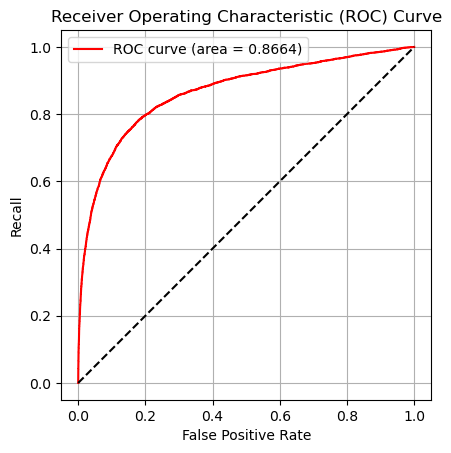

In [37]:
##使用auc对模型进行改进
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt

FPR, Recall, thresholds = ROC(ytest, model.decision_function(xtest), pos_label=1)

plt.figure()
plt.plot(FPR, Recall, color="red", label="ROC curve (area = %0.4f)" % auc)
plt.plot([0, 1], [0, 1], color='k', linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("Recall")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.grid()
plt.gca().set_aspect('equal')
plt.legend(loc=0)
plt.show()

In [39]:
###找最大的点的索引
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
maxindex

3022

In [40]:
thresholds[maxindex]

-0.7037402875347925

In [42]:
from sklearn.metrics import accuracy_score
times = time()
model = SVC(kernel = "rbf",
            C = 1.2,
            class_weight = {1: 1.04625},
            gamma = 0.14,
            cache_size = 8000
           ).fit(xtrain,ytrain)
prob = pd.DataFrame(model.decision_function(xtest)) #置信度
#对于置信度里的所有值,大于阈值为1,小于阈值为0
prob.loc[prob.iloc[:,0] >= thresholds[maxindex], "y_pred"] = 1
prob.loc[prob.iloc[:,0] < thresholds[maxindex], "y_pred"] = 0
prob.loc[:,"y_pred"].isnull().sum()

score = accuracy_score(ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(ytest,prob.loc[:,"y_pred"])

print("Testing accuracy: %f, Recall: %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S"))

A:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing accuracy: 0.812417, Recall: 0.780358
48:31


In [ ]:
##最佳阈值下,recall增高但是accuracy也降低了